# Letras de cambio

Una letra de cambio es un documento mercantil mediante el cuál una persona o empresa queda obligada a pagarle una cantidad de dinero a otra en un plazo preestablecido. En otras palabras, es un título-valor que garantiza una deuda entre dos partes.

En toda letra de cambio intervienen como mínimo las siguientes partes:

**El librador o girador.** Es la persona (física o jurídica) que emite la letra de cambio, es decir, quién elabora el documento y da la orden de pago.

**El librado o girado.** Es quién acepta la orden de pago y, por tanto, tiene la obligación de pagar la deuda a su beneficiario. El librado es el deudor oficial de esta operación.

**El beneficiario o tomador.** Es a quién finalmente se le paga, es decir, la persona que recibe el dinero correspondiente a la deuda. Puede coincidir con el librador, aunque no tiene por qué. Dependerá de si la letra ha sido endosada o no.

Si estamos en posesión de letras de cambio, podemos llevarlas al banco para su descuento, y aquí es donde entra la parte de matemática financiera para calcular los intereses que nos cobrará el banco, y el montante final que nos será abonado.


FÓRMULA MATEMÁTICA FINANCIERA

La fórmula que nos permite calcular el montante final, así como los intereses es:

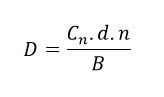


Donde:

Cn = nominal del título

n= número de días que van desde la fecha de liquidación a la fecha de vencimiento

d= tipo o tasa de descuento

B= base anual aplicada (360 o 365)

Con estos datos vamos a cálcularlo mediante Python de una forma sencilla

**Ejemplo 1.** Nuestra empresa lleva a descontar una letra de cambio que posee en su cartera de efectos el día 20 de octubre de 2014. La letra tiene un valor nominal de 1.500 euros y vence el 30 de diciembre de 2014. La letra se descuenta en el Banco de Sabadell y le aplica un tipo de interés de descuento del 5 %.

En este módulo trabajaremos con fechas, por lo que es necesario importar una libería que nos permita realizar operaciones con fechas y calcular los días, o cualquier otra cosa que necesitemos

In [1]:
from datetime import datetime, date, time, timedelta

In [2]:
Cn = 1500                  #Valor nominal de la letra
f_vto = date(2014,12,30)   #fecha de vencimiento de la letra (Docstring:      date(year, month, day) --> date object)
f_liq = date(2014,10,20)   #fecha en la que llevamos a descontar la letra, fecha de liquidación (Docstring:      date(year, month, day) --> date object)
t = 0.05                   #Tasa de descuento de la letra
b = 360                    #puede ser 365 o 360

n = f_vto - f_liq
print("Los días a descontar son", n.days, "días")

D = (Cn*n.days*t)/b
print("Los intereses aplicados son {}".format(round(D,2)))

Los días a descontar son 71 días
Los intereses aplicados son 14.79


**Ejemplo 2.** El 7 de enero de 2013 una empresa descuenta en Gestión Bank una letra de cambio de 2.485 euros de valor nominal y cuya fecha de vencimiento es el 7 de marzo de 2014. El banco le aplica un tipo de interés de descuento del 6 %.

¿Cuál será el interés total cobrado por el banco en la operación de descuento?

In [63]:
Cn = 2485                  
f_liq = date(2013,1,7)  
f_vto = date(2014,3,7)  
t = 0.06                 
b = 360    
n = f_vto -f_liq


D = (Cn*(n.days)*t)/b
print("Los intereses totales cobrado por el banco son {}".format(round(D,2)))

efectivo = Cn-D
print("Y por tanto el efectivo recibido es ", round(efectivo,2))

Los intereses totales cobrado por el banco son 175.61
Y por tanto el efectivo recibido es  2309.39


Si tuvieramos que realizar esta operación mediante **Excel** utilizaríamos la fórmula **INT.ACUM.V**

En anteriores apartados hemos visto que Numpy Financial contiene varias fórmulas financieras equivalentes en Excel, pero no es este el caso. Por ello vamos a crear una función que nos permita realizar este cálculo de forma atumática.

In [82]:
def INT_ACUM_V(i, f_vto, f_liq, b, Cn):
    '''
       INTERESES ACUMULADOS
      ======================
    
        nos devuelve el total de intereses producidos por un activo financiero con pago de dichos intereses al vencimiento
    
        i = tasa
        f_vto = fecha de vencimiento real de letra utilizando el formato date(AAAA,MM,DD)
        f_liq = fecha en la que llevamos la letra al descuento, formato date(AAAA,MM,DD) 
        b = base de referencia según tablas
        Cn = importe de la letra de cambio
        
        TABLA BASES
        1 = 365
        2 = 360'''
    
    if b == 1:
        b = 365
    elif b == 2:
        b= 360
    else:
        print("Error! Debe introducir 1 o 2 para el valor b")
        
    n = f_vto -f_liq
    D = (Cn*(n.days)*i)/b
    return print("Los intereses totales cobrados por el banco son {}".format(round(D,2)))

In [91]:
def EFECTIVO(D, Cn):
    '''
        CÁLCULO DE TOTAL EFECTIVO RECIBIDO
        ==================================
        
        esta función nos calcula el importe efectivo recibido una vez descontados los intereses
    
        D = intereses cobrados por el banco
        Cn = Importe Letra de Cambio'''
    
    efectivo = Cn-D
    
    return print("Y por tanto el efectivo recibido es ", round(efectivo,2))

In [83]:
i = float(input('Introduzca el tipo de interés (Ejemplo 8%: 0.08) : '))
datos_vto = input('Introduzca la fecha de vencimiento de la Letra de Cambio (forma YYYY-MM-DD)')
año, mes, dia = map(int, datos_vto.split('-'))
f_vto = date(año, mes, dia)
datos_liq = input('Introduzca la fecha de liquidación de la Letra de Cambio (forma YYYY-MM-DD)')
año, mes, dia = map(int, datos_liq.split('-'))
f_liq = date(año, mes, dia)
b = float(input('Introduzca 1 para base de 365 días o 2 para base de 360'))
Cn = float(input('Introduzca importe de la Letra de Cambio'))


INT_ACUM_V(i, f_vto, f_liq, b, Cn)

Introduzca el tipo de interés (Ejemplo 8%: 0.08) : 0.06
Introduzca la fecha de vencimiento de la Letra de Cambio (forma YYYY-MM-DD)2014-03-07
Introduzca la fecha de liquidación de la Letra de Cambio (forma YYYY-MM-DD)2013-01-07
Introduzca 1 para base de 365 días o 2 para base de 3602
Introduzca importe de la Letra de Cambio2485
Los intereses totales cobrado por el banco son 175.61


In [85]:
Cn = float(input('Introduzca importe de la Letra de Cambio'))
D = float(input('Introduzca los intereses cobrados por el Banco'))


EFECTIVO(D, Cn)

Introduzca importe de la Letra de Cambio2485
Introduzca los intereses cobrados por el Banco175.61
Y por tanto el efectivo recibido es  2309.39


# Letras del Tesoro

Las Letras del Tesoro son títulos de deuda pública emitidos al descuento como forma de financiación del Estado, normalmente a corto plazo, y aunque son inversiones de renta fija no están exentas de cierto riesgo aunque menor en comparación con otros productos, por eso su rentabilidad suele ser menor también.

Que las letras estén emitidas al descuento significa que el valor nominal de la letra es de 1.000 euros, y su precio de compra estará por debajo de ese valor, la diferencia entre el valor de compra y venta nos determinará su rentabilidad.

Por tanto, las letras del tesoro pueden ser adquiridas en múltiplos de 1.000 eruos, y dado que son a corto plazo (hecho que las distingue de los Bonos y Obligaciones), su duración es menor a 18 meses, normalmente 3, 6, 12 y 18 meses.

FÓRMULA MATEMÁTICA FINANCIERA

La fórmula que nos permite calcular el montante final, así como los intereses es:

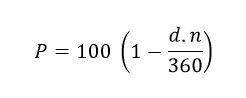


Donde:

**P** es el precio del título expresado en tanto por ciento del valor nominal.

**n** es el número de días comprendidos entre la fecha de adquisición y la fecha de vencimiento.

**d** es el tipo o tasa de descuento

Debemos tener en cuenta que la función estudiada está diseñada para aquellos mercados, por ejemplo en EEUU, que cotizan al descuento y publican directamente el tipo de descuento.

Para adaptar esta función al mercado español de Letras del Tesoro deberemos calcular el tipo de descuento “d” equivalente al tipo de interés “i” publicado en la subasta de los títulos, a partir de la ecuación de igualdad entre descuento comercial y descuento racional:

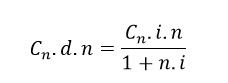
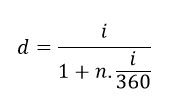
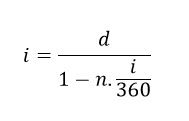

Donde:

**Cn** es el valor nominal del título descontado.

**n** son los días que van desde la fecha de adquisición hasta la fecha de vencimiento.

**i** es el tipo de interés

**d** es la tasa de descuento

Vamos a ver algunos ejemplos para comprender la teoría:

**Ejemplo 1.** En la subasta realizada el 23 de septiembre de 2014 nuestra empresa solicitó 60 letras del Tesoro en el tramo no competitivo. La dirección General del tesoro nos comunica que nos han adjudicado los 60 títulos. Los resultados de la subasta han sido los siguientes:

Fecha de adquisición: 26 de septiembre de 2014

Fecha de vencimiento: 12 de diciembre de 2014

Tipo de interés medio: 0,056 %

Se pide:

Calcular el precio medio de una letra en tanto por ciento sobre su valor nominal.

Calcular la inversión y el rendimiento obtenido si las letras se mantienen hasta la fecha de su vencimiento.

In [25]:
f_adq = date(2014,9,26)
f_vto = date(2014,12,12)
n = f_adq - f_vto
i = 0.00056

#Primer paso: Cálculo tasa de descuento

d = i/(1+(n.days*i/360))
print("La tasa de descuento es", round(d,6))

#Segundo paso: Cálculo precio de adquisición

P = (1+(d*n.days/360))
print("El precio medio de una letra es ", round(P,6))

#En porcentaje:

Po = 100*(1+(d*n.days/360))
print("El precio medio de una letra en porcentaje es ", round(Po,3), "%")

#Capital que hemos invertido: nos han adjudicado 60 títulos:

títulos = 60
C_inver = P*títulos*1000
print("El capital invertido es", round(C_inver,2), "euros")

#Pero su valor de amortización es:

V_amortz = títulos*1000
print("El valor de amortización es", round(V_amortz,2), "euros")

#Y por tanto el rendimiento es:
rendim = V_amortz - C_inver
print("Rendimiento de la inversión es", round(rendim,2), "euros")


La tasa de descuento es 0.00056
El precio medio de una letra es  0.99988
El precio medio de una letra en porcentaje es  99.988 %
El capital invertido es 59992.81 euros
El valor de amortización es 60000 euros
Rendimiento de la inversión es 7.19 euros


**Ejemplo 2.** En la subasta realizada el 16 de septiembre de 2014 nuestra empresa solicitó 100 letras del Tesoro en el tramo no competitivo. La dirección General del Tesoro nos comunica que nos han adjudicado los 60 títulos. Los resultados de la subasta han sido los siguientes:

Fecha de adquisición: 16 de septiembre de 2014

Fecha de vencimiento: 18 de septiembre de 2015

Tipo de interés medio: 0,219 %

In [87]:
f_adq = date(2014,9,16)
f_vto = date(2015,9,18)
n = f_adq - f_vto
i = 0.00219
títulos = 60

d = i/(1+(n.days*i/360))
print("La tasa de descuento es", round(d,6))

P = (1+(d*n.days/360))
print("El precio medio de una letra es ", round(P,6))

Po = 100*(1+(d*n.days/360))
print("El precio medio de una letra en porcentaje es ", round(Po,3), "%")

títulos = 60
C_inver = P*títulos*1000
print("El capital invertido es", round(C_inver,2), "euros")

V_amortz = títulos*1000
print("El valor de amortización es", round(V_amortz,2), "euros")

rendim = V_amortz - C_inver
print("Rendimiento de la inversión es", round(rendim,2), "euros")

La tasa de descuento es 0.002195
El precio medio de una letra es  0.997762
El precio medio de una letra en porcentaje es  99.776 %
El capital invertido es 59865.75 euros
El valor de amortización es 60000 euros
Rendimiento de la inversión es 134.25 euros


Si tuvieramos que realizar esta operación mediante **Excel** utilizaríamos la fórmula **LETRA.DE.TES.PRECIO**

En anteriores apartados hemos visto que Numpy Financial contiene varias fórmulas financieras equivalentes en Excel, pero no es este el caso. Por ello vamos a crear una función que nos permita realizar este cálculo de forma atumática.

In [88]:
def LETRA_DE_TES_PRECIO(i, f_adq, f_vto):
    '''
        CÁLCULO DEL PRECIO
        ==================
        
        Esta función nos calcula el precio por cada cien euros de valor nominal, 
        de una Letra del Tesoro o cualquier otro activo financiero que funcione al descuento, 
        tales como pagarés o letras de cambio, a un tipo o una tasa de descuento determinada, 
        siempre que los días de descuento sean inferiores a 366.
        
        i = Tipo o tasa de descuento anual del título
        f_adq = Introducimos la fecha de compra o adquisición del activo financiero
        f_vto = Introduciremos la fecha de vencimiento del activo financiero'''
    
    n = f_adq - f_vto
    d = i/(1+(n.days*i/360))
    Po = 100*(1+(d*n.days/360))
    return print("El precio medio de una letra en porcentaje es ", round(Po,3), "%")

In [90]:
i = float(input('Introduzca el tipo de interés (Ejemplo 8%: 0.08) : '))
datos_vto = input('Introduzca la fecha de vencimiento de la Letra de Cambio (forma YYYY-MM-DD)')
año, mes, dia = map(int, datos_vto.split('-'))
f_adq = date(año, mes, dia)
datos_liq = input('Introduzca la fecha de liquidación de la Letra de Cambio (forma YYYY-MM-DD)')
año, mes, dia = map(int, datos_liq.split('-'))
f_vto = date(año, mes, dia)

LETRA_DE_TES_PRECIO(i, f_adq, f_vto)

Introduzca el tipo de interés (Ejemplo 8%: 0.08) : 0.00219
Introduzca la fecha de vencimiento de la Letra de Cambio (forma YYYY-MM-DD)2014-9-16
Introduzca la fecha de liquidación de la Letra de Cambio (forma YYYY-MM-DD)2015-9-18
El precio medio de una letra en porcentaje es  99.776 %


**Ejemplo 3.** En la subasta realizada el 23 de septiembre de 2014 nuestra empresa solicitó 60 letras del Tesoro en el tramo no competitivo. La dirección General del tesoro nos comunica que nos han adjudicado los 60 títulos. Los resultados de la subasta han sido los siguientes:

Fecha de adquisición: 26 de septiembre de 2014

Fecha de vencimiento: 12 de diciembre de 2014

Precio medio en la subasta: 99,988

SE PIDE: Calcular el tipo de interés de la operación financiera utilizando la función

*Para solucionar este ejercicio necesitamos la fórmula matemática:*

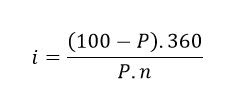

In [107]:
f_adq = date(2014,9,26)
f_vto = date(2014,12,12)
n = f_vto -f_adq
Pm = 99.988

i = ((100-Pm)*360)/(Pm*n.days)
i = i*100
print("El tipo de interés de esta operación es", round(i,3), "%")

El tipo de interés de esta operación es 0.056 %


Si tuvieramos que realizar esta operación mediante **Excel** utilizaríamos la fórmula **LETRA.DE.TES.RENDTO**

En anteriores apartados hemos visto que Numpy Financial contiene varias fórmulas financieras equivalentes en Excel, pero no es este el caso. Por ello vamos a crear una función que nos permita realizar este cálculo de forma atumática.

In [111]:
def LETRA_DE_TES_RENDTO(Pm, f_adq, f_vto):
    '''
        CÁLCULO DEL RENDIMIENTO
        =======================
        
        Esta función nos calcula el tipo de interés o rendimiento, 
        en régimen de capitalización simple (año comercial de 360 días), 
        de una Letra del Tesoro Público o pagaré a un plazo que no supere los 365 días 
        y siempre que conozcamos su precio expresado en porcentaje de su valor nominal.
        
        Pm = Es el precio de la letra o pagaré expresado en tanto por ciento de su valor nominal
        f_adq = Introducimos la fecha de compra o adquisición del activo financiero
        f_vto = Introduciremos la fecha de vencimiento del activo financiero'''
    
    n = f_vto -f_adq
    i = ((100-Pm)*360)/(Pm*n.days)
    i = i*100
    return print("El tipo de interés de esta operación es", round(i,3), "%")

In [116]:
Pm = float(input('Introduzca el precio de la letra expresado en tanto por ciento (Ejemplo: 99.998): '))
datos_vto = input('Introduzca la fecha de vencimiento de la Letra de Cambio (forma YYYY-MM-DD)')
año, mes, dia = map(int, datos_vto.split('-'))
f_vto = date(año, mes, dia)
datos_adq = input('Introduzca la fecha de liquidación de la Letra de Cambio (forma YYYY-MM-DD)')
año, mes, dia = map(int, datos_liq.split('-'))
f_adq = date(año, mes, dia)

LETRA_DE_TES_RENDTO(Pm, f_adq, f_vto)

Introduzca el precio de la letra expresado en tanto por ciento (Ejemplo: 99.998): 99.988
Introduzca la fecha de vencimiento de la Letra de Cambio (forma YYYY-MM-DD)2014-12-12
Introduzca la fecha de liquidación de la Letra de Cambio (forma YYYY-MM-DD)2014-9-26
El tipo de interés de esta operación es 0.056 %


# Bonos y Obligaciones

*Mientras que las Letras del Tesoro están pensadas como un producto a corto plazo (menos de 18 meses), los bonos se emiten a largo plazo (entre 3 y 5 años) y las obligaciones a más largo plazo (10, 15 ó 30 años), por tanto funcionan de una forma parecida a los depósitos, solo que la emisión de deuda se hace en múltiplos de 1.000 euros.*

*Además, la contratación de Bonos u Obligaciones no se realiza a descuento, sino que se ofrece un tipo de interes al que se será remunerado anualmente la inversión, es decir, si contratas un bono a 3 años, cada año se abonarán unos intereses a una rentabilidad previamente fijada, se denomina **Cupón**. Por tanto su funcionamiento es similar a los depósitos, solo que los intereses están calculados mediante interés simple*

FÓRMULA MATEMÁTICA FINANCIERA

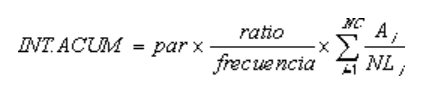

Donde:

**Ai** es el número de días acumulados para el iésimo período de un cuasi-cupón dentro de un período irregular.

**NC** número de períodos de un cuasi-cupón en un período irregular. Si este número contiene una fracción, auméntelo al siguiente número entero.

**NLi** duración normal en días del iésimo período de un cuasi-cupón dentro de un período irregular.

Vamos a ver un ejemplo práctico:

**Ejemplo 3** Nuestra empresa compra el 19 de junio de 2014 un Bono del Estado a 5 años emitido el 15 de marzo de 2014 a un tipo nominal de interés del 3,25 %, cuyo valor nominal es de 1.000 euros y paga el cupón anualmente.

Si nuestra empresa vende el título el 19 de junio de 2016, calcula el importe de los intereses acumulados por dicho bono hasta la fecha en que se vende. 

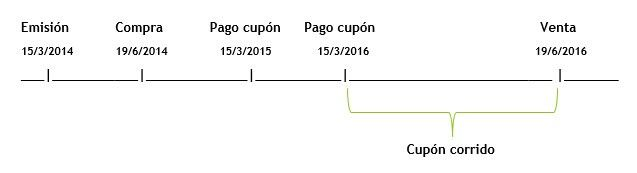

In [44]:
Cn = 1000                         #Valor nominal de nuestro Bono
f_emision = date(2014,3,15)       #Fecha Emisión Bono
f_venta = date(2016,6,19)         #Fecha en la que se vende el Bono
n = (f_venta-f_emision)           #Cálculo de días para el cálculo de intereses (restamos 1 día porque incluye todos, pero el de la venta no se debe incluir)
n = n.days -1
base = 365                        #Base del año (puede ser 360 o 365)
i = 0.0325                        #tipo de interés

int_acum = Cn*i*((n)/base)        #Fórmula intereses simple
print("Los intereses acumulados hasta la fecha '{}' son {} euros".format(f_venta, round(int_acum,2)))

Los intereses acumulados hasta la fecha '2016-06-19' son 73.55 euros


En toda letra de Tesoro intervienen como mínimo las siguientes partes:

**Emisión** Fecha en en que el título es emitido por el organismo correspondiente

**Primer interés** Fecha de pago del primer cupón

**Liquidación** Fecha de negociación o liquidación del título

**Tasa** Es el tipo de interés nominal del título

**Par** Es el valor nominal del título (1.000 euros)

**Frecuencia** Es el número de cupones que paga el título al año (anual, semestral, trimestral, etc.)

Vamos a ver algunos ejemplos para comprender la teoría:

In [4]:
pip install numpy-financial

Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy_financial as npf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
C0 = float(input("Precio de compra de la letra(incluyendo gastos y comisiones): "))  #solicitamos el precio de compra
n = int(input("Vencimiento en meses: "))             #el vencimiento
Cn = 1000                                            #Al final siempre obtendremos el nominal, que son 1.000 euros
cf = []    #Vamos a generar nuestros flujos para calcular la rentabilidad

cf.append(-C0)   #Lo primero incorporar en negativo el desembolso inicial      

for i in range(1, n, 1):   #después vamos a rellenar con 0 los periodos entre el incio y el final
    cf.append(0)

cf.append(Cn)     #por último incorporamos el nominal

tir = (npf.irr(cf))*100  #Con la fórmula financiera IRR calculamos la rentabilidad de la Letra.

print("La rentabilidad de la letra es {} %".format(round(tir,2)))


Precio de compra de la letra(incluyendo gastos y comisiones): 999.88
Vencimiento en meses: 2
La rentabilidad de la letra es 0.01 %


In [12]:
def TIR(nper, pv, fv = 1000):
    cf = []   
    cf.append(-pv)        
    for i in range(1, nper, 1):   
        cf.append(0)

    cf.append(fv) 

    tir = (npf.irr(cf))*100
    return tir
    

In [38]:
class Letras:
    
    @property 
    def nper(self): return self._nper
    @nper.setter
    def nper(self, nper):
        if type(nper) == int and nper > 0:
            self._nper = nper
        else: print("Periodo debe ser > 0")
            
    @property
    def pv(self): return self._pv
    @pv.setter
    def pv(self, pv):
        if (type(pv) == int or type(pv) == float) and pv > 0:
            self._pv = pv
        else: print("El precio de compra debe ser > 0")
    
    def __init__(self, nper, pv, fv = 1000):                   
        self.nper = nper
        self.pv = pv                 
        self.fv = fv #al llamar a la función de inicio si no se pone esta cantidad no pasa nada.
        
    def TIR(self):
        tir = TIR(self.nper, self.pv, self.fv)
        return print("La rentabilidad de la letra es {} %".format(round(tir,2)))
    
    def TIRr(self):
        tir = TIR(self.nper, self.pv, self.fv)
        return tir
        

*Ejemplo de como funciona*

In [26]:
Letra1 = Letras(3,950)
Letra1.TIR()

La rentabilidad de la letra es 1.72 %


*Probemos con varias letras*

In [59]:
letra1 = Letras(6, 958)
letra2 = Letras(9, 879)
letra3 = Letras(6, 960)
letra4 = Letras(12, 898)
letra5 = Letras(3, 980)

In [60]:
rentabilidad = []

a = letra1.TIRr()
rentabilidad.append(a)

a = letra2.TIRr()
rentabilidad.append(a)

a = letra3.TIRr()
rentabilidad.append(a)

a = letra4.TIRr()
rentabilidad.append(a)

a = letra5.TIRr()
rentabilidad.append(a)

print(rentabilidad)

[0.7176881420101644, 1.443320963148742, 0.6826863266752081, 0.9005744103874003, 0.6756961723555666]


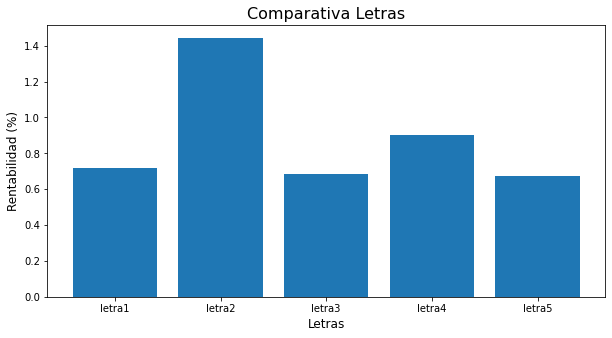

In [61]:
p = ['letra1', 'letra2', 'letra3', 'letra4', 'letra5']
plt.figure(figsize = (10, 5))
plt.bar(p, rentabilidad)
plt.title("Comparativa Letras", fontsize = 16)
plt.xlabel("Letras", fontsize = 12)
plt.ylabel("Rentabilidad (%)", fontsize=12)
plt.show()

En este caso, la letra más rentable es la 2